# Sklearn -- Ordinary least squares Linear Regression.
Author: Baburao Kamble

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# looks like the following:
class Estimator(object):
    def fit(self, X, Y=None):
        return self
    def predict(self, X):
        return pred # returns 2-dim array (n_samples, n_classes)
class Transformer(Estimator): 
# class to transform input data eg. selects subset of features or extracts new features based on initial
    def transform(self, X):
        # transforms input data
        return X_prime
    def fit(self, X):
        return X_fit

def linearRegressionExample(X, Y):
# fit-intercept defines if we should fit an intrecpt term or not
    est = LinearRegression(fit_intercept=False)
    #fit the data
    est.fit(X,Y)
    # get coefficients
    return est.coef_

def transformExample(X):
    # scaler method
    scaler = StandardScaler(copy=True)
    X_centered = scaler.fit(X).transform(X)
    return scaler.mean_ # mean subtracted from transform


In [133]:
#import data
data = np.genfromtxt('input.csv', delimiter=',')
# response is in the first column
Y = data[:, 0]
X = data[:, 1:]
print linearRegressionExample(X,Y)
print transformExample(X)

[ 0.96015361  0.94154883]
[ 5.11960775  4.94590286]


In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from ggplot import *
# Load the GPA dataset
data=np.genfromtxt("gpa.csv", delimiter=",", dtype=None, names=True)

(0, 4)

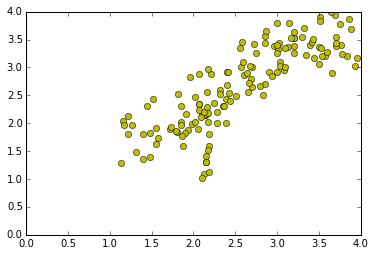

In [135]:
x=data['HSGPA']; y=data['CollegeGPA']
plt.plot(x,y, 'yo')
plt.xlim(0, 4)
plt.ylim(0, 4)

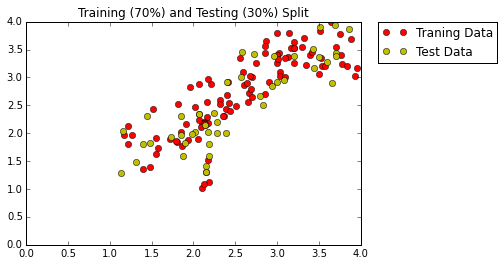

In [136]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
plt.plot(X_train,y_train, 'ro', label="Traning Data")
plt.plot(X_test,y_test, 'yo', label="Test Data")
# Place a legend to the right of this smaller figure.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(0, 4); plt.ylim(0, 4)
plt.title('Training (70%) and Testing (30%) Split')

In [137]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X_train[:,np.newaxis],y_train)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

Coefficients: 0.830609820816
Residual sum of squares: 0.16
Variance score: 0.71


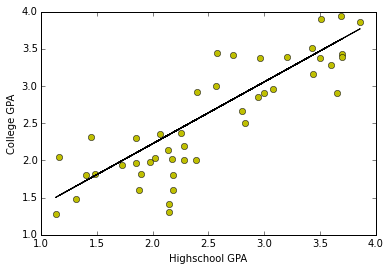

In [138]:
# The Estimated coefficients for the linear regression fit 
print'Coefficients:', regr.coef_[0]
# The mean square error
print("Residual sum of squares: %.2f"% np.mean((regr.predict(X_test[:,np.newaxis]) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test[:,np.newaxis], y_test))
# Plot outputs
plt.plot(X_test,y_test, 'yo')
plt.plot(X_test, regr.predict(X_test[:,np.newaxis]), color='black',linewidth=1)
plt.xlabel('Highschool GPA'); plt.ylabel('College GPA'); 
plt.show()